## <center> Company Sales Prediction Based on Marketing Techniques. </center>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Read the dataset
df0 = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

print("Shape:", df0.shape)
df0.head()

Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# <center> Dataset Inspection </center>

In [3]:
# Sum the NAN data
df0.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
df0.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# Describe the dataset
df0.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# <center> Data Cleaning </center>

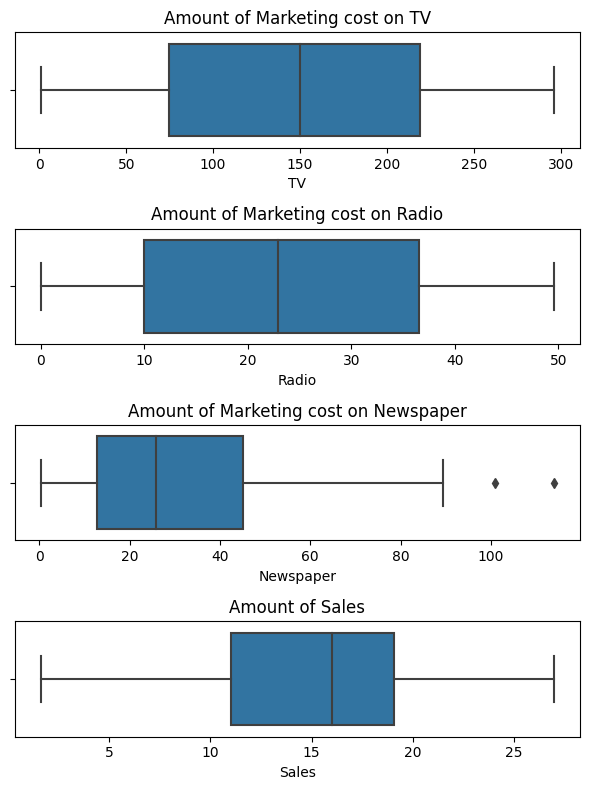

In [6]:
# View outliers using bloxplot

# Set up subplots with Seaborn
fig, axes = plt.subplots(4, 1, figsize=(6, 8))

# Plot boxplots using Seaborn
sns.boxplot(x=df0['TV'], ax=axes[0])
sns.boxplot(x=df0['Radio'], ax=axes[1])
sns.boxplot(x=df0['Newspaper'], ax=axes[2])
sns.boxplot(x=df0['Sales'], ax=axes[3])

# Set titles for each subplot
axes[0].set_title("Amount of Marketing cost on TV")
axes[1].set_title("Amount of Marketing cost on Radio")
axes[2].set_title("Amount of Marketing cost on Newspaper")
axes[3].set_title("Amount of Sales")

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

In [7]:
# Newspaper Last five digits maximum value
df0['Newspaper'].nlargest(5).tail(5)

16     114.0
101    100.9
75      89.4
165     84.8
118     79.2
Name: Newspaper, dtype: float64

In [8]:
# Remove the newspaper outliers value
upper_limit = 95
df1 = df0[df0['Newspaper'] < upper_limit]

In [9]:
print("Shape:", df1.shape)
df1.sample(6)

Shape: (198, 4)


,TV,Radio,Newspaper,Sales
44,25.1,25.7,43.3,8.5
5,8.7,48.9,75.0,7.2
18,69.2,20.5,18.3,11.3
175,276.9,48.9,41.8,27.0
67,139.3,14.5,10.2,13.4
37,74.7,49.4,45.7,14.7


In [10]:
print("Total Row Remove:", df0.shape[0] - df1.shape[0] )

Total Row Remove: 2


In [11]:
df = df1.copy()

# <center> Exploratory Data Analysis </center>

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.899974
Radio,0.051978,1.000000,0.346364,0.348566
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.899974,0.348566,0.151764,1.000000


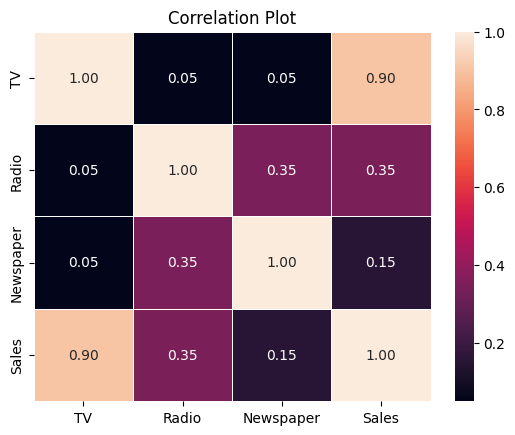

In [14]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", lw=0.5)
plt.title("Correlation Plot")
plt.show()

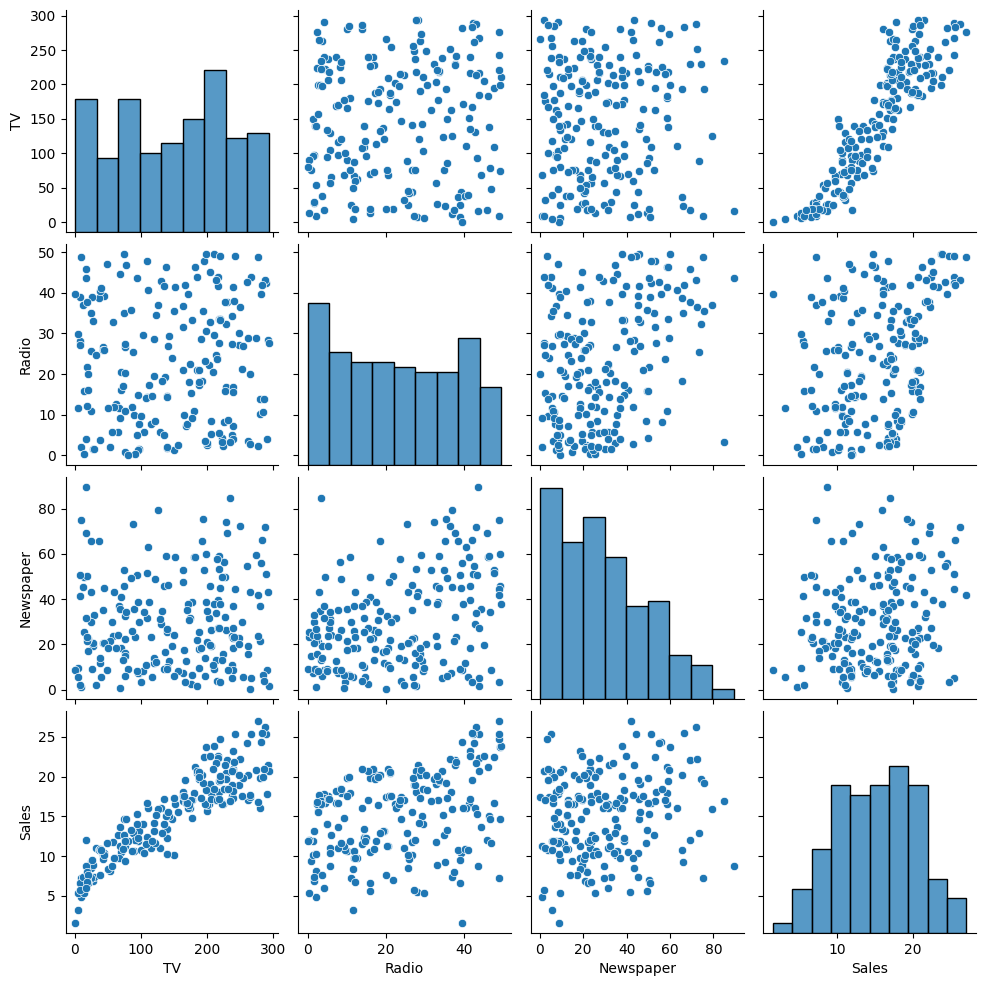

In [15]:
sns.pairplot(df)
plt.show()

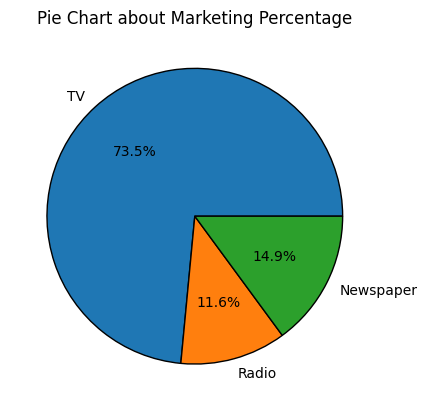

In [16]:
amounts = []
columns = ['TV', 'Radio', 'Newspaper']
for i in columns:
    amounts.append(df[i].sum())

plt.title("Pie Chart about Marketing Percentage")
plt.pie(amounts, labels=columns, autopct="%1.1f%%", wedgeprops={'edgecolor': 'black'} )
plt.show()

# <center> Model Building </center>

In [17]:
X = df.drop('Sales', axis="columns")
y = df['Sales']

In [18]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)

X_train Shape: (158, 3)
X_test Shape: (40, 3)


# Linear Regression Model

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = linear_model.predict(X_test)

In [22]:
# Model Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2.7874439327296705
R2 Score: 0.8683630769194961


Lower MSE indicates better model performance. <br/>
Higher value of R2 indicating a better fit of the model.

# XGBoost Regressor

### Using GridSearchCV to find the best parameters.

In [23]:
n_estimators = [ 30, 40, 50]
learning_rate = [0.1, 0.2, 0.3]
max_depth = [ 6, 7, 8]
gamma = [0.01, 0.1, 0.5]

clf = GridSearchCV(XGBRegressor(), {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'gamma': gamma
    },
    cv=5,
    return_train_score=False
)

clf.fit(X, y)
clf_results = pd.DataFrame(clf.cv_results_)
print("Best Params:", clf.best_params_)

clf_results.sort_values(by="rank_test_score", inplace=True)
clf_results[['param_gamma', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score']]

Best Params: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 40}


,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score
40,0.1,0.2,7,40,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",1
41,0.1,0.2,7,50,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",2
39,0.1,0.2,7,30,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",3
14,0.01,0.2,7,50,"{'gamma': 0.01, 'learning_rate': 0.2, 'max_dep...",4
11,0.01,0.2,6,50,"{'gamma': 0.01, 'learning_rate': 0.2, 'max_dep...",5
...,...,...,...,...,...,...
3,0.01,0.1,7,30,"{'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...",77
57,0.5,0.1,7,30,"{'gamma': 0.5, 'learning_rate': 0.1, 'max_dept...",78
33,0.1,0.1,8,30,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",79
0,0.01,0.1,6,30,"{'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...",80


In [24]:
xgb_model = XGBRegressor(gamma= 0.1, learning_rate= 0.2, max_depth= 7, n_estimators= 40)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1.185777081564414
R2 Score: 0.9440017269428403


**Comment:** XGBoost Mean Squared Error is lower then the Regression Model. So XGBRegressor is the best model.

# Prediction Sales using XGBoost

In [25]:
df.sample(5)

,TV,Radio,Newspaper,Sales
78,5.4,29.9,9.4,5.3
57,136.2,19.2,16.6,13.2
134,36.9,38.6,65.6,10.8
62,239.3,15.5,27.3,20.7
196,94.2,4.9,8.1,14.0


In [26]:
features_data = {
    "TV": [239],
    "Radio": [15],
    "Newspaper": [27]
}

sales_pred = xgb_model.predict(pd.DataFrame(features_data))
print("Prediction Sales:", sales_pred[0])

Prediction Sales: 19.391602
